In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

path = ''
path_to_data = path + 'Original Data/training_set/'
path_to_track_data = path + 'Original Data/track_features/'

seed=123

In [2]:
# Working with particular subset of Music Streaming Sessions Dataset
log = pd.read_csv(path_to_data + 'log_0_20180715_000000000000.csv')

# Convert cols with 0/1 into bool
log['context_switch'] = log['context_switch'].astype(bool)
log['no_pause_before_play'] = log['no_pause_before_play'].astype(bool)
log['short_pause_before_play'] = log['short_pause_before_play'].astype(bool)
log['long_pause_before_play'] = log['long_pause_before_play'].astype(bool)

log

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,False,False,...,False,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,False,True,...,False,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,False,True,...,False,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,False,True,...,False,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,False,True,...,False,0,0,True,16,2018-07-15,True,editorial_playlist,trackdone,trackdone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990604,0_ffffc3a8-e6fd-49a0-9bf9-2b464c14f769,16,20,t_7cfd4fc9-6811-41a2-8bea-daed723afc69,True,True,True,False,False,True,...,False,0,0,True,5,2018-07-15,True,user_collection,fwdbtn,backbtn
2990605,0_ffffc3a8-e6fd-49a0-9bf9-2b464c14f769,17,20,t_5c99f04b-47c6-4307-bb21-75b068b5d078,True,True,True,False,False,True,...,False,0,0,True,5,2018-07-15,True,user_collection,backbtn,fwdbtn
2990606,0_ffffc3a8-e6fd-49a0-9bf9-2b464c14f769,18,20,t_7cfd4fc9-6811-41a2-8bea-daed723afc69,True,True,True,False,False,True,...,False,0,0,True,5,2018-07-15,True,user_collection,fwdbtn,backbtn
2990607,0_ffffc3a8-e6fd-49a0-9bf9-2b464c14f769,19,20,t_5c99f04b-47c6-4307-bb21-75b068b5d078,False,False,True,False,False,True,...,False,4,0,True,5,2018-07-15,True,user_collection,backbtn,fwdbtn


In [3]:
track0 = pd.read_csv(path_to_track_data + 'tf_000000000000.csv')
track1 = pd.read_csv(path_to_track_data + 'tf_000000000001.csv')
track = track0.append(track1)

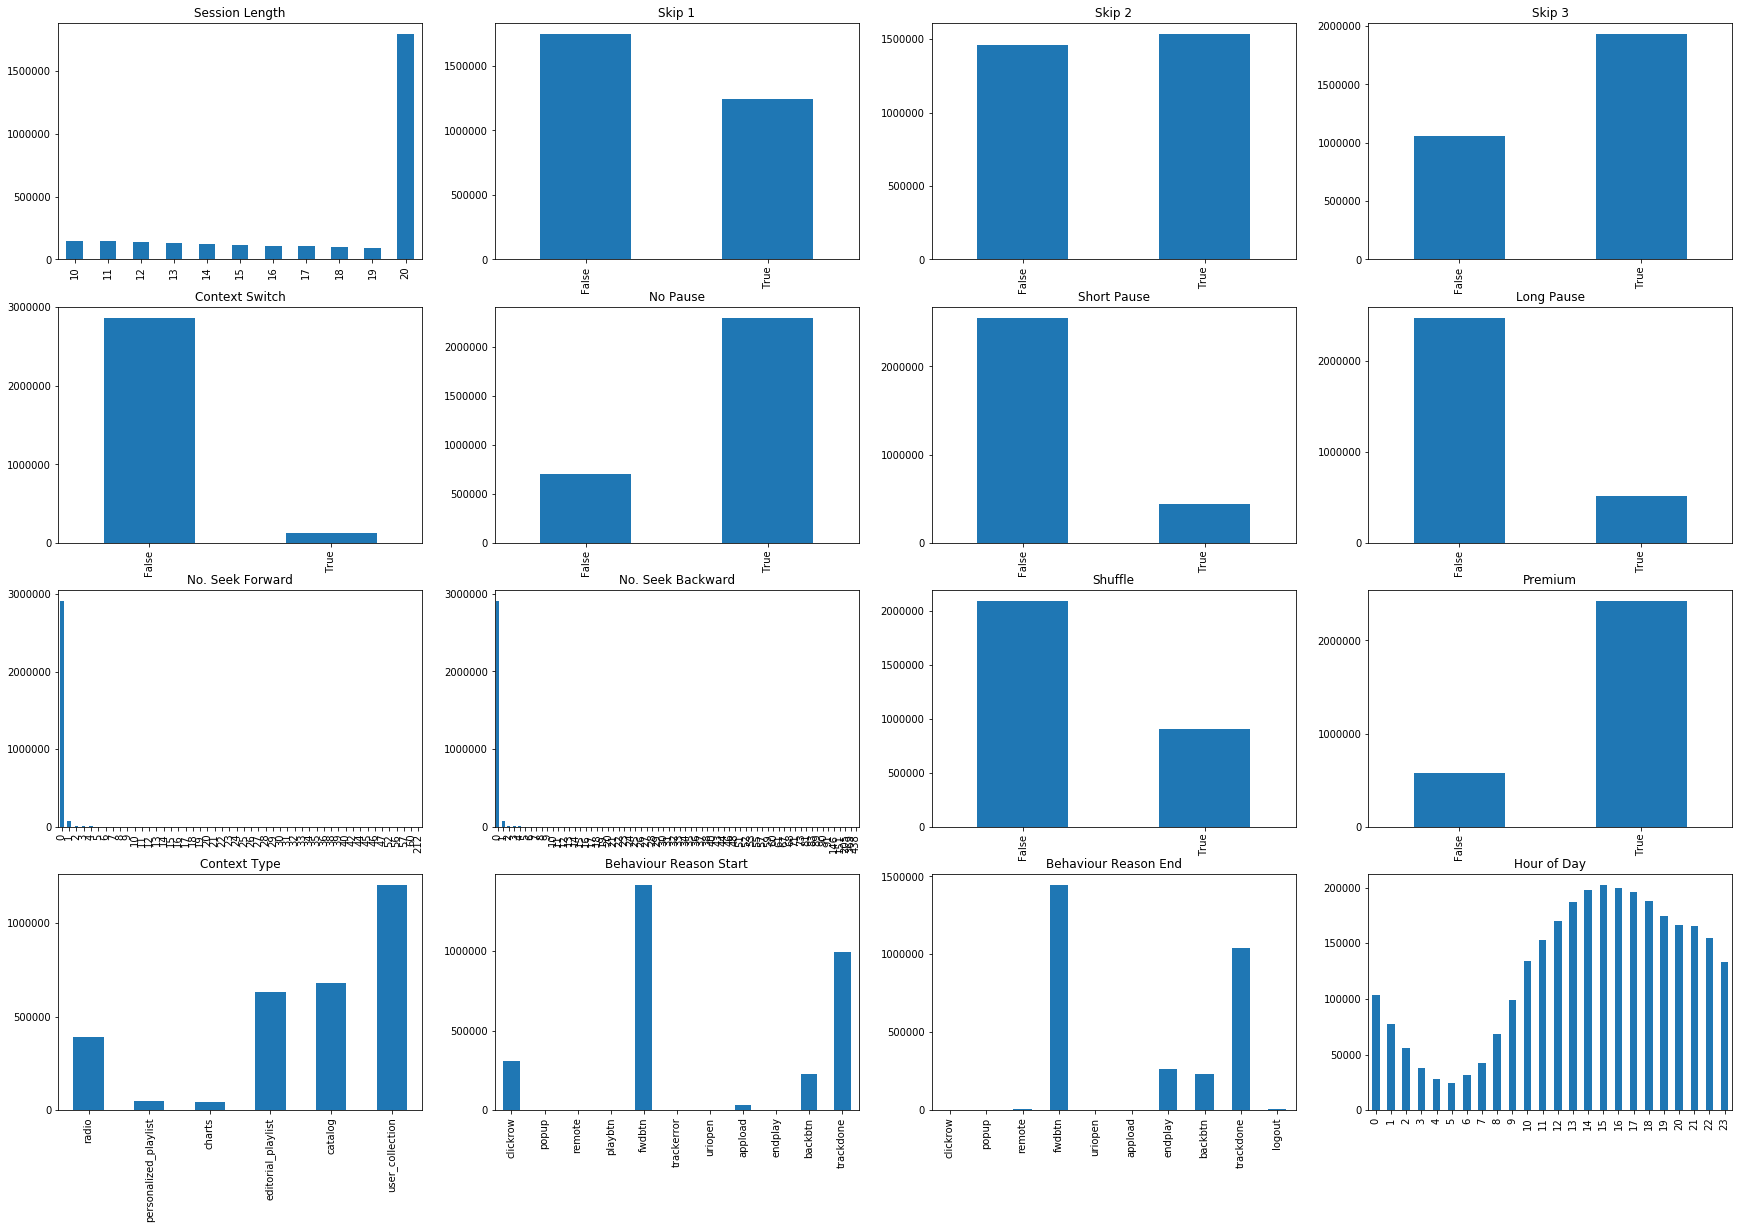

In [4]:
# Track Statistics

f, ax = plt.subplots(4, 4, figsize=(30,20))
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title

log['session_length'].value_counts(sort=False).plot(ax=ax[0][0], kind='bar')
log['skip_1'].value_counts(sort=False).plot(ax=ax[0][1], kind='bar')
log['skip_2'].value_counts(sort=False).plot(ax=ax[0][2], kind='bar')
log['skip_3'].value_counts(sort=False).plot(ax=ax[0][3], kind='bar')
log['context_switch'].value_counts(sort=False).plot(ax=ax[1][0], kind='bar')
log['no_pause_before_play'].value_counts(sort=False).plot(ax=ax[1][1], kind='bar')
log['short_pause_before_play'].value_counts(sort=False).plot(ax=ax[1][2], kind='bar')
log['long_pause_before_play'].value_counts(sort=False).plot(ax=ax[1][3], kind='bar')
log['hist_user_behavior_n_seekfwd'].value_counts(sort=False).plot(ax=ax[2][0], kind='bar')
log['hist_user_behavior_n_seekback'].value_counts(sort=False).plot(ax=ax[2][1], kind='bar')
log['hist_user_behavior_is_shuffle'].value_counts(sort=False).plot(ax=ax[2][2], kind='bar')
log['premium'].value_counts(sort=False).plot(ax=ax[2][3], kind='bar')
log['context_type'].value_counts(sort=False).plot(ax=ax[3][0], kind='bar')
log['hist_user_behavior_reason_start'].value_counts(sort=False).plot(ax=ax[3][1], kind='bar')
log['hist_user_behavior_reason_end'].value_counts(sort=False).plot(ax=ax[3][2], kind='bar')
log['hour_of_day'].value_counts(sort=False).plot(ax=ax[3][3], kind='bar')

ax[0][0].title.set_text('Session Length')
ax[0][1].title.set_text('Skip 1')
ax[0][2].title.set_text('Skip 2')
ax[0][3].title.set_text('Skip 3')
ax[1][0].title.set_text('Context Switch')
ax[1][1].title.set_text('No Pause')
ax[1][2].title.set_text('Short Pause')
ax[1][3].title.set_text('Long Pause')
ax[2][0].title.set_text('No. Seek Forward')
ax[2][1].title.set_text('No. Seek Backward')
ax[2][2].title.set_text('Shuffle')
ax[2][3].title.set_text('Premium')
ax[3][0].title.set_text('Context Type')
ax[3][1].title.set_text('Behaviour Reason Start')
ax[3][2].title.set_text('Behaviour Reason End')
ax[3][3].title.set_text('Hour of Day');

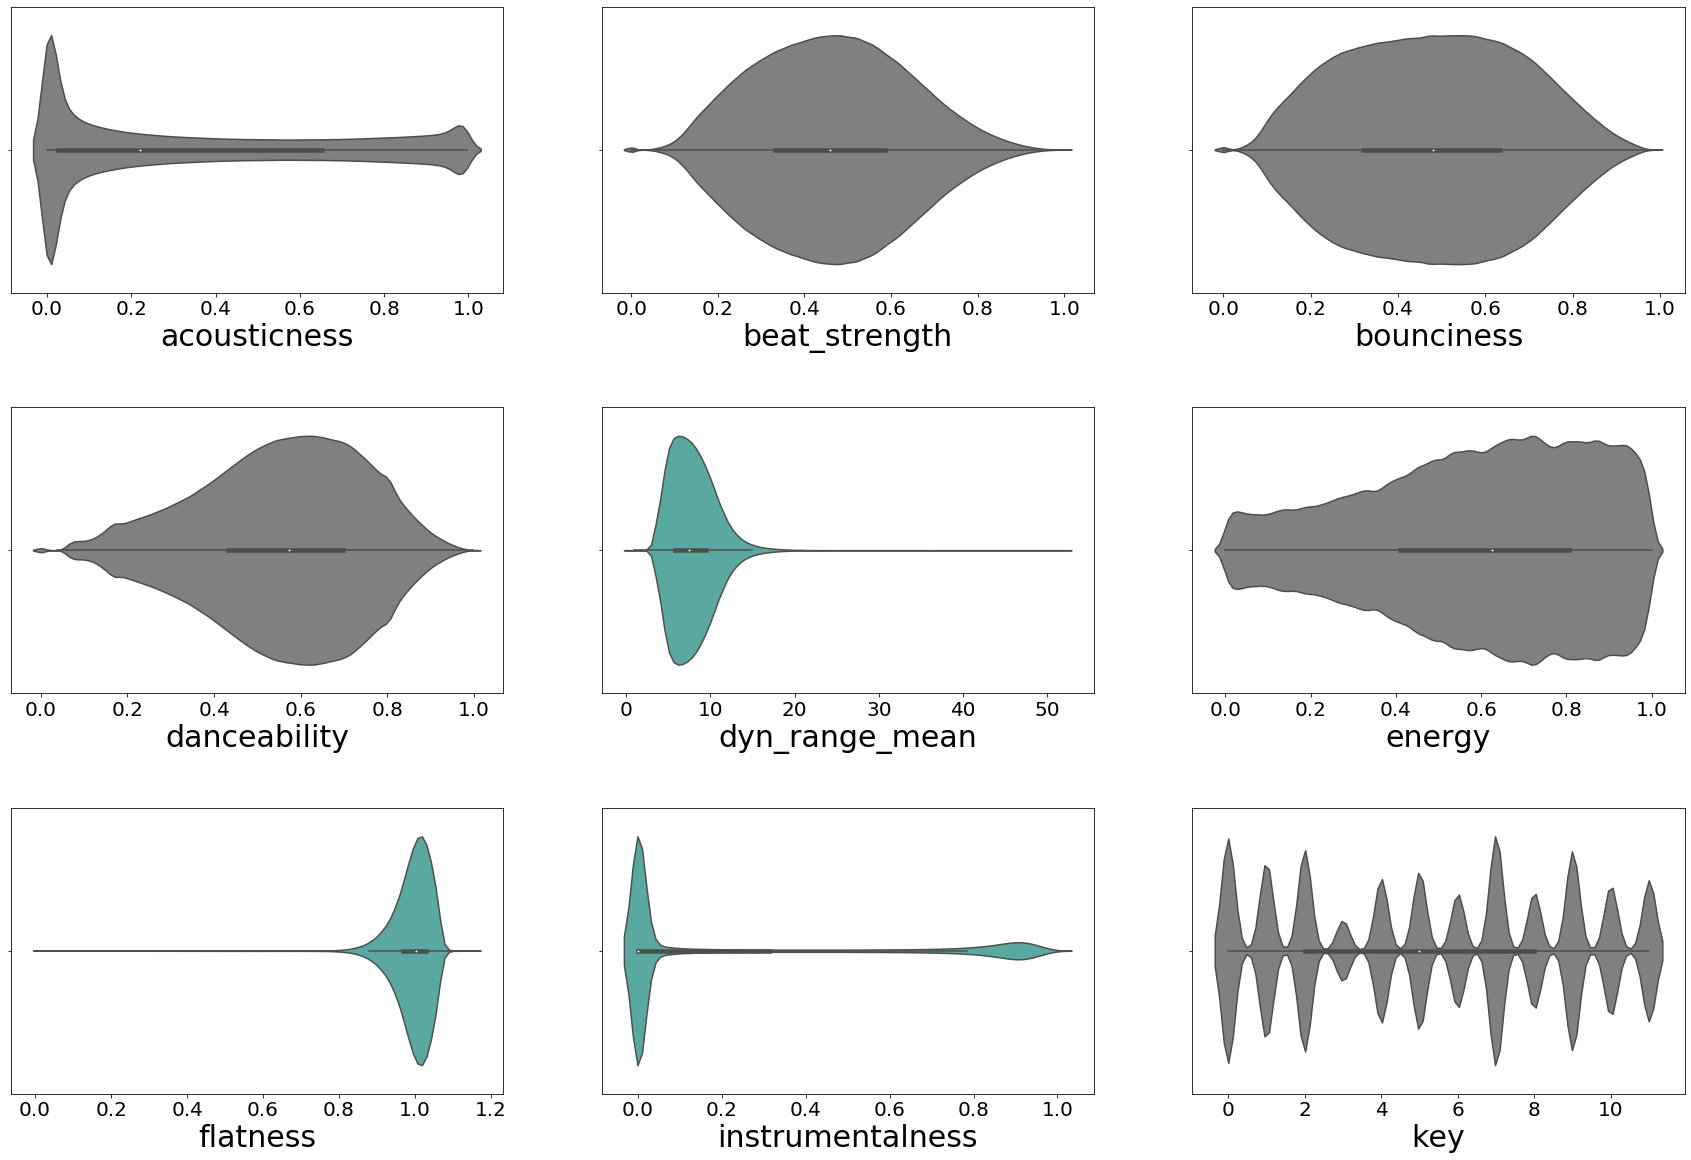

In [6]:
# Audio attribute distribution of values

f, ax = plt.subplots(3, 3, figsize=(30,20))

# sns.violinplot(track['duration'], ax=ax[0][0])
# sns.violinplot(track['release_year'], ax=ax[0][1])
# sns.violinplot(track['us_popularity_estimate'], ax=ax[0][2])

plt.subplots_adjust(hspace = 0.4)
plt.rc('font', size=30)          # controls default text sizes
plt.rc('axes', titlesize=30)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=30)  # fontsize of the figure title

sns.violinplot(track['acousticness'], ax=ax[0][0], color='gray')
sns.violinplot(track['beat_strength'], ax=ax[0][1], color='gray')
sns.violinplot(track['bounciness'], ax=ax[0][2], color='gray')

sns.violinplot(track['danceability'], ax=ax[1][0], color='gray')
sns.violinplot(track['dyn_range_mean'], ax=ax[1][1], color='#4db6ac')
sns.violinplot(track['energy'], ax=ax[1][2], color='gray')

sns.violinplot(track['flatness'], ax=ax[2][0], color='#4db6ac')
sns.violinplot(track['instrumentalness'], ax=ax[2][1], color='#4db6ac')
sns.violinplot(track['key'], ax=ax[2][2], color='gray')

# sns.violinplot(track['liveness'], ax=ax[3][0])
# sns.violinplot(track['loudness'], ax=ax[3][1])
# sns.violinplot(track['mechanism'], ax=ax[3][2])

# sns.violinplot(pd.Series(np.where(track['mode'] =='major', 1, 0), name='mode'), ax=ax[4][0])
# sns.violinplot(track['organism'], ax=ax[4][1])
# sns.violinplot(track['speechiness'], ax=ax[4][2])

# sns.violinplot(track['tempo'], ax=ax[5][0])
# sns.violinplot(track['time_signature'], ax=ax[5][1])
# sns.violinplot(track['valence'], ax=ax[5][2])

# sns.violinplot(track['acoustic_vector_0'], ax=ax[6][0])
# sns.violinplot(track['acoustic_vector_1'], ax=ax[6][1])
# sns.violinplot(track['acoustic_vector_2'], ax=ax[6][2])

# sns.violinplot(track['acoustic_vector_3'], ax=ax[7][0])
# sns.violinplot(track['acoustic_vector_4'], ax=ax[7][1])
# sns.violinplot(track['acoustic_vector_5'], ax=ax[7][2])

# sns.violinplot(track['acoustic_vector_6'], ax=ax[8][0])
# sns.violinplot(track['acoustic_vector_7'], ax=ax[8][1])

In [6]:
# Convert cols with 0/1 into bool
log['context_switch'] = log['context_switch'].astype(bool)
log['no_pause_before_play'] = log['no_pause_before_play'].astype(bool)
log['short_pause_before_play'] = log['short_pause_before_play'].astype(bool)
log['long_pause_before_play'] = log['long_pause_before_play'].astype(bool)

log.rename(columns={'track_id_clean': 'track_id'}, inplace=True)

In [7]:
raw_data = log.merge(track, left_on='track_id', right_on='track_id')
raw_data.sort_values(by=['session_id', 'session_position'], inplace=True)
raw_data

,session_id,session_position,session_length,track_id,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,24_00002747-26a4-4152-b5cb-0c86ebde3d18,1,15,t_2029280f-6211-44bd-bb8c-3ac4a5f55ace,False,True,True,False,False,False,...,4,0.487813,-0.736434,0.286483,0.323644,0.044070,-0.299250,0.063849,-0.442010,0.129730
6665,24_00002747-26a4-4152-b5cb-0c86ebde3d18,2,15,t_ad18d76a-0d74-4e97-9458-6b5ed7da7cfb,True,True,True,False,False,True,...,4,0.252317,-0.583361,0.206106,0.164610,-0.081684,-0.217386,0.052871,-0.562427,0.115967
11767,24_00002747-26a4-4152-b5cb-0c86ebde3d18,3,15,t_24374be8-ea7c-448b-8903-2a7594a3e358,True,True,True,False,False,True,...,4,0.426252,-0.874921,0.318795,0.216507,0.090888,-0.269675,-0.019422,-0.569362,0.152059
17990,24_00002747-26a4-4152-b5cb-0c86ebde3d18,4,15,t_030b8d87-4f72-4f91-82ed-d0b054be3461,True,True,True,False,False,True,...,4,0.113103,-0.516835,0.130108,0.190835,0.109373,-0.129713,-0.015243,-0.296250,-0.026359
23947,24_00002747-26a4-4152-b5cb-0c86ebde3d18,5,15,t_1710fcac-4b57-4823-9c66-c93ba147af19,True,True,True,False,False,True,...,4,0.555773,-0.755489,0.291135,0.247978,0.023565,-0.312820,0.035710,-0.497590,0.169371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6664,24_ffffefc0-dc8a-4547-a423-f90e828164a4,9,13,t_2029280f-6211-44bd-bb8c-3ac4a5f55ace,False,False,False,True,False,False,...,4,0.487813,-0.736434,0.286483,0.323644,0.044070,-0.299250,0.063849,-0.442010,0.129730
673721,24_ffffefc0-dc8a-4547-a423-f90e828164a4,10,13,t_1d21d3fc-d1dd-4060-a4f2-18a70944ffb7,False,True,True,False,False,False,...,4,0.503008,-0.846920,0.197610,0.203668,0.247379,-0.355765,-0.084246,-0.310331,0.239324
668102,24_ffffefc0-dc8a-4547-a423-f90e828164a4,11,13,t_36619b94-a6b1-4194-9de6-8ffee358018b,False,False,True,False,False,True,...,4,0.062047,-0.692931,0.254632,0.215149,0.039964,-0.380358,0.028079,-0.405417,0.276741
11766,24_ffffefc0-dc8a-4547-a423-f90e828164a4,12,13,t_ad18d76a-0d74-4e97-9458-6b5ed7da7cfb,False,False,False,True,False,True,...,4,0.252317,-0.583361,0.206106,0.164610,-0.081684,-0.217386,0.052871,-0.562427,0.115967


In [8]:
# Save data to file
raw_data.to_csv(path + 'raw_data.csv', index=False)

## (optional analysis) Calculate best/current/worst metrics across sessions

In [9]:
target = 'skip_2'
K=10
NUM_SESSIONS = 10000

In [10]:
# https://gist.github.com/bwhite/3726239/
def dcg_score(y_score, k=999):
    y = y_score[:k]
    score = 0
    
    for i in range(len(y)):
        score += (2**y[i] - 1) / np.log2(i+2)

    return np.sum(score)

def ndcg_score(y_score, k=999):
    y = y_score[:k]
    
    idcg = dcg_score(sorted(y_score, reverse=True), k)
    return dcg_score(y_score, k) / idcg if idcg > 0 else 0

def precision_score(y_score, k=999):
    cumulative_score = 0
    num_pos = 0
    y = y_score[:k]
    
    return np.sum(y) / len(y)

def average_precision_score(y_score, k=999):
    cumulative_score = 0
    num_pos = 0
    y = y_score[:k]
    
    for i in range(len(y)):
        if y[i] == 1:
            num_pos += 1
            cumulative_score += num_pos / (i+1)
    
    return cumulative_score / num_pos if num_pos > 0 else 0

def reciprocal_rank(y_score, k=999):
    y = y_score[:k]
    
    try:
        return 1/(y.index(1)+1)
    except ValueError:
        return 0

In [11]:
def calc_metrics(results, K=10, mode='current'):
    metrics = []
    
    i=0

    for session_id in results['session_id'].unique():
        session_results = results.loc[results['session_id'] == session_id]

        if mode == 'best':
            session_results = session_results.sort_values(by=['relevance'], ascending=False)
        elif mode == 'worst':
            session_results = session_results.sort_values(by=['relevance'])

        y = list(session_results.reset_index(drop=True)['relevance'])

        ap = average_precision_score(y)
        ap_K = average_precision_score(y, K)
        
        ndcg = ndcg_score(y)
        ndcg_K = ndcg_score(y, K)
        
        p = precision_score(y)
        p_K = precision_score(y, K)
        
        rr = reciprocal_rank(y)
        rr_K = reciprocal_rank(y, K)
        
        metrics.append([session_id, ap, ndcg, p, rr, ap_K, ndcg_K, p_K, rr_K])

        i+=1
        if i%100 == 0:
            print('Processed {} sessions'.format(i))
            
    return pd.DataFrame(metrics, columns=['session_id', 'AP', 'NDCG', 'P', 'RR', 'AP@{}'.format(K), 'NDCG@{}'.format(K), 'P@{}'.format(K), 'RR@{}'.format(K)])

In [12]:
data = raw_data[['session_id','session_position','session_length',target]].reset_index(drop=True)
data['relevance'] = ~data[target]
data[target] = data[target].astype(int)
data['relevance'] = data['relevance'].astype(int)
data

,session_id,session_position,session_length,skip_2,relevance
0,24_00002747-26a4-4152-b5cb-0c86ebde3d18,1,15,1,0
1,24_00002747-26a4-4152-b5cb-0c86ebde3d18,2,15,1,0
2,24_00002747-26a4-4152-b5cb-0c86ebde3d18,3,15,1,0
3,24_00002747-26a4-4152-b5cb-0c86ebde3d18,4,15,1,0
4,24_00002747-26a4-4152-b5cb-0c86ebde3d18,5,15,1,0
...,...,...,...,...,...
3152545,24_ffffefc0-dc8a-4547-a423-f90e828164a4,9,13,0,1
3152546,24_ffffefc0-dc8a-4547-a423-f90e828164a4,10,13,1,0
3152547,24_ffffefc0-dc8a-4547-a423-f90e828164a4,11,13,0,1
3152548,24_ffffefc0-dc8a-4547-a423-f90e828164a4,12,13,0,1


In [13]:
# Take subset of sessions
sample_session_ids = pd.DataFrame(data['session_id'].unique()).sample(NUM_SESSIONS, random_state=seed)
data = data[data['session_id'].isin(sample_session_ids[0])]

In [14]:
# Calculate metrics for sessions in their current state
current_metrics = calc_metrics(data)
current_metrics

Processed 100 sessions
Processed 200 sessions
Processed 300 sessions
Processed 400 sessions
Processed 500 sessions
Processed 600 sessions
Processed 700 sessions
Processed 800 sessions
Processed 900 sessions
Processed 1000 sessions
Processed 1100 sessions
Processed 1200 sessions
Processed 1300 sessions
Processed 1400 sessions
Processed 1500 sessions
Processed 1600 sessions
Processed 1700 sessions
Processed 1800 sessions
Processed 1900 sessions
Processed 2000 sessions
Processed 2100 sessions
Processed 2200 sessions
Processed 2300 sessions
Processed 2400 sessions
Processed 2500 sessions
Processed 2600 sessions
Processed 2700 sessions
Processed 2800 sessions
Processed 2900 sessions
Processed 3000 sessions
Processed 3100 sessions
Processed 3200 sessions
Processed 3300 sessions
Processed 3400 sessions
Processed 3500 sessions
Processed 3600 sessions
Processed 3700 sessions
Processed 3800 sessions
Processed 3900 sessions
Processed 4000 sessions
Processed 4100 sessions
Processed 4200 sessions
P

,session_id,AP,NDCG,P,RR,AP@10,NDCG@10,P@10,RR@10
0,24_000d01f3-e35f-470d-b1ee-25e13704a17d,0.646368,0.859311,0.300000,1.000,0.750000,0.698058,0.4,1.000
1,24_0010d313-adbc-42b2-a8a0-31bfae17061c,0.713186,0.898668,0.550000,1.000,0.810516,0.678049,0.6,1.000
2,24_0016a19d-b2bb-43ff-bdf9-50459a0901a3,0.995238,0.998938,0.933333,1.000,1.000000,1.000000,1.0,1.000
3,24_001bf22a-1f45-4438-b282-5efc79deb019,0.896260,0.964140,0.700000,1.000,0.906041,0.905212,0.9,1.000
4,24_001ca893-2f05-4564-bf71-e2e58b5fe471,0.351941,0.547955,0.416667,0.200,0.326290,0.453349,0.4,0.200
...,...,...,...,...,...,...,...,...,...
9995,24_ffbcc253-7bb8-4588-804f-e9a4c97e9429,0.696190,0.850298,0.250000,1.000,0.696190,0.850298,0.5,1.000
9996,24_ffd5e459-0f35-4bb4-b3a0-6cd48a357722,0.933333,0.979683,0.600000,1.000,0.933333,0.979683,0.6,1.000
9997,24_ffdd57f5-37ea-42a9-9ba6-1b8f8703a11b,0.964975,0.991855,0.900000,1.000,1.000000,1.000000,1.0,1.000
9998,24_fff6a062-65ae-4813-b7fc-bbc6771c7d0d,0.407313,0.595967,0.588235,0.125,0.215741,0.199306,0.3,0.125


In [15]:
# Calculate metrics for sessions in their best possible state
best_metrics = calc_metrics(data, mode='best')
best_metrics

Processed 100 sessions
Processed 200 sessions
Processed 300 sessions
Processed 400 sessions
Processed 500 sessions
Processed 600 sessions
Processed 700 sessions
Processed 800 sessions
Processed 900 sessions
Processed 1000 sessions
Processed 1100 sessions
Processed 1200 sessions
Processed 1300 sessions
Processed 1400 sessions
Processed 1500 sessions
Processed 1600 sessions
Processed 1700 sessions
Processed 1800 sessions
Processed 1900 sessions
Processed 2000 sessions
Processed 2100 sessions
Processed 2200 sessions
Processed 2300 sessions
Processed 2400 sessions
Processed 2500 sessions
Processed 2600 sessions
Processed 2700 sessions
Processed 2800 sessions
Processed 2900 sessions
Processed 3000 sessions
Processed 3100 sessions
Processed 3200 sessions
Processed 3300 sessions
Processed 3400 sessions
Processed 3500 sessions
Processed 3600 sessions
Processed 3700 sessions
Processed 3800 sessions
Processed 3900 sessions
Processed 4000 sessions
Processed 4100 sessions
Processed 4200 sessions
P

,session_id,AP,NDCG,P,RR,AP@10,NDCG@10,P@10,RR@10
0,24_000d01f3-e35f-470d-b1ee-25e13704a17d,1.0,1.0,0.300000,1.0,1.0,1.0,0.6,1.0
1,24_0010d313-adbc-42b2-a8a0-31bfae17061c,1.0,1.0,0.550000,1.0,1.0,1.0,1.0,1.0
2,24_0016a19d-b2bb-43ff-bdf9-50459a0901a3,1.0,1.0,0.933333,1.0,1.0,1.0,1.0,1.0
3,24_001bf22a-1f45-4438-b282-5efc79deb019,1.0,1.0,0.700000,1.0,1.0,1.0,1.0,1.0
4,24_001ca893-2f05-4564-bf71-e2e58b5fe471,1.0,1.0,0.416667,1.0,1.0,1.0,0.5,1.0
...,...,...,...,...,...,...,...,...,...
9995,24_ffbcc253-7bb8-4588-804f-e9a4c97e9429,1.0,1.0,0.250000,1.0,1.0,1.0,0.5,1.0
9996,24_ffd5e459-0f35-4bb4-b3a0-6cd48a357722,1.0,1.0,0.600000,1.0,1.0,1.0,0.6,1.0
9997,24_ffdd57f5-37ea-42a9-9ba6-1b8f8703a11b,1.0,1.0,0.900000,1.0,1.0,1.0,1.0,1.0
9998,24_fff6a062-65ae-4813-b7fc-bbc6771c7d0d,1.0,1.0,0.588235,1.0,1.0,1.0,1.0,1.0


In [16]:
# Calculate metrics for sessions in their worse possible state
worst_metrics = calc_metrics(data, mode='worst')
worst_metrics

Processed 100 sessions
Processed 200 sessions
Processed 300 sessions
Processed 400 sessions
Processed 500 sessions
Processed 600 sessions
Processed 700 sessions
Processed 800 sessions
Processed 900 sessions
Processed 1000 sessions
Processed 1100 sessions
Processed 1200 sessions
Processed 1300 sessions
Processed 1400 sessions
Processed 1500 sessions
Processed 1600 sessions
Processed 1700 sessions
Processed 1800 sessions
Processed 1900 sessions
Processed 2000 sessions
Processed 2100 sessions
Processed 2200 sessions
Processed 2300 sessions
Processed 2400 sessions
Processed 2500 sessions
Processed 2600 sessions
Processed 2700 sessions
Processed 2800 sessions
Processed 2900 sessions
Processed 3000 sessions
Processed 3100 sessions
Processed 3200 sessions
Processed 3300 sessions
Processed 3400 sessions
Processed 3500 sessions
Processed 3600 sessions
Processed 3700 sessions
Processed 3800 sessions
Processed 3900 sessions
Processed 4000 sessions
Processed 4100 sessions
Processed 4200 sessions
P

,session_id,AP,NDCG,P,RR,AP@10,NDCG@10,P@10,RR@10
0,24_000d01f3-e35f-470d-b1ee-25e13704a17d,0.192253,0.432395,0.300000,0.066667,0.000000,0.000000,0.0,0.000000
1,24_0010d313-adbc-42b2-a8a0-31bfae17061c,0.371005,0.577661,0.550000,0.100000,0.100000,0.063621,0.1,0.100000
2,24_0016a19d-b2bb-43ff-bdf9-50459a0901a3,0.834412,0.866342,0.933333,0.500000,0.785670,0.779908,0.9,0.500000
3,24_001bf22a-1f45-4438-b282-5efc79deb019,0.508112,0.665723,0.700000,0.142857,0.281548,0.272670,0.4,0.142857
4,24_001ca893-2f05-4564-bf71-e2e58b5fe471,0.285505,0.493390,0.416667,0.125000,0.215741,0.307130,0.3,0.125000
...,...,...,...,...,...,...,...,...,...
9995,24_ffbcc253-7bb8-4588-804f-e9a4c97e9429,0.161468,0.399843,0.250000,0.062500,0.000000,0.000000,0.0,0.000000
9996,24_ffd5e459-0f35-4bb4-b3a0-6cd48a357722,0.436243,0.599744,0.600000,0.200000,0.436243,0.599744,0.6,0.200000
9997,24_ffdd57f5-37ea-42a9-9ba6-1b8f8703a11b,0.766918,0.821936,0.900000,0.333333,0.642758,0.641046,0.8,0.333333
9998,24_fff6a062-65ae-4813-b7fc-bbc6771c7d0d,0.407313,0.595967,0.588235,0.125000,0.215741,0.199306,0.3,0.125000


In [17]:
# All metrics combined
comb_metrics = best_metrics.merge(worst_metrics, left_on='session_id', right_on='session_id', suffixes=('_best', '_worst'))
comb_metrics = comb_metrics.merge(current_metrics, left_on='session_id', right_on='session_id')

session_data = data[['session_id', 'session_length', 'skip_2']]
session_data = session_data.groupby(['session_id']).mean()
session_data = session_data.reset_index()

comb_metrics = comb_metrics.merge(session_data, left_on='session_id', right_on='session_id')
comb_metrics

,session_id,AP_best,NDCG_best,P_best,RR_best,AP@10_best,NDCG@10_best,P@10_best,RR@10_best,AP_worst,...,AP,NDCG,P,RR,AP@10,NDCG@10,P@10,RR@10,session_length,skip_2
0,24_000d01f3-e35f-470d-b1ee-25e13704a17d,1.0,1.0,0.300000,1.0,1.0,1.0,0.6,1.0,0.192253,...,0.646368,0.859311,0.300000,1.000,0.750000,0.698058,0.4,1.000,20.0,0.700000
1,24_0010d313-adbc-42b2-a8a0-31bfae17061c,1.0,1.0,0.550000,1.0,1.0,1.0,1.0,1.0,0.371005,...,0.713186,0.898668,0.550000,1.000,0.810516,0.678049,0.6,1.000,20.0,0.450000
2,24_0016a19d-b2bb-43ff-bdf9-50459a0901a3,1.0,1.0,0.933333,1.0,1.0,1.0,1.0,1.0,0.834412,...,0.995238,0.998938,0.933333,1.000,1.000000,1.000000,1.0,1.000,15.0,0.066667
3,24_001bf22a-1f45-4438-b282-5efc79deb019,1.0,1.0,0.700000,1.0,1.0,1.0,1.0,1.0,0.508112,...,0.896260,0.964140,0.700000,1.000,0.906041,0.905212,0.9,1.000,20.0,0.300000
4,24_001ca893-2f05-4564-bf71-e2e58b5fe471,1.0,1.0,0.416667,1.0,1.0,1.0,0.5,1.0,0.285505,...,0.351941,0.547955,0.416667,0.200,0.326290,0.453349,0.4,0.200,12.0,0.583333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24_ffbcc253-7bb8-4588-804f-e9a4c97e9429,1.0,1.0,0.250000,1.0,1.0,1.0,0.5,1.0,0.161468,...,0.696190,0.850298,0.250000,1.000,0.696190,0.850298,0.5,1.000,20.0,0.750000
9996,24_ffd5e459-0f35-4bb4-b3a0-6cd48a357722,1.0,1.0,0.600000,1.0,1.0,1.0,0.6,1.0,0.436243,...,0.933333,0.979683,0.600000,1.000,0.933333,0.979683,0.6,1.000,10.0,0.400000
9997,24_ffdd57f5-37ea-42a9-9ba6-1b8f8703a11b,1.0,1.0,0.900000,1.0,1.0,1.0,1.0,1.0,0.766918,...,0.964975,0.991855,0.900000,1.000,1.000000,1.000000,1.0,1.000,20.0,0.100000
9998,24_fff6a062-65ae-4813-b7fc-bbc6771c7d0d,1.0,1.0,0.588235,1.0,1.0,1.0,1.0,1.0,0.407313,...,0.407313,0.595967,0.588235,0.125,0.215741,0.199306,0.3,0.125,17.0,0.411765


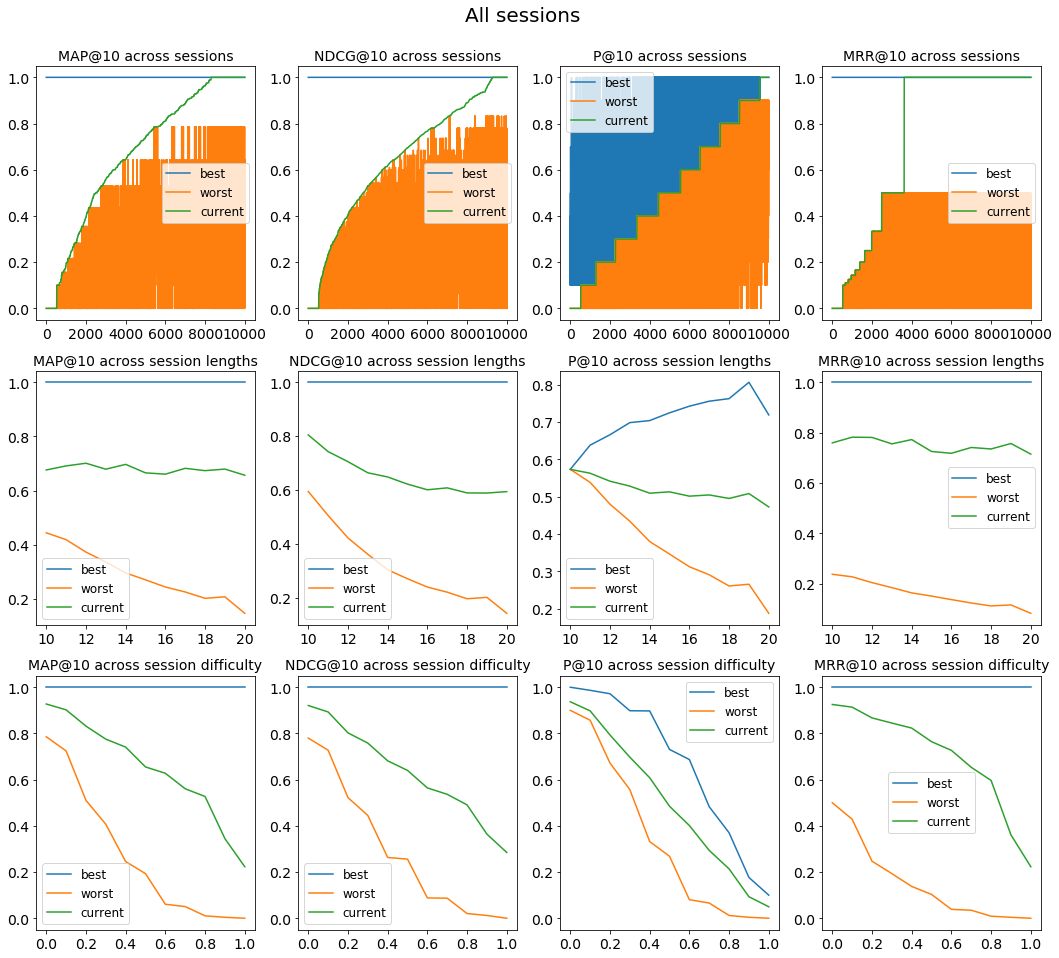

In [29]:
# Plots showing the distribution of best/current/worst metrics across all sessions
f, ax = plt.subplots(3, 4, figsize=(18,15))

f.suptitle('All sessions', fontsize=20)
f.subplots_adjust(top=0.925)

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=12)     # fontsize of the axes title
plt.rc('axes', labelsize=12)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=12)  # fontsize of the figure title

temp = comb_metrics.sort_values(by=['AP@10'])
ax[0][0].plot(range(len(temp)), list(temp['AP@10_best']), label='best')
ax[0][0].plot(range(len(temp)), list(temp['AP@10_worst']), label='worst')
ax[0][0].plot(range(len(temp)), list(temp['AP@10']), label='current')
ax[0][0].legend()
ax[0][0].title.set_text('MAP@10 across sessions');

temp = comb_metrics.sort_values(by=['NDCG@10'])
ax[0][1].plot(range(len(temp)), list(temp['NDCG@10_best']), label='best')
ax[0][1].plot(range(len(temp)), list(temp['NDCG@10_worst']), label='worst')
ax[0][1].plot(range(len(temp)), list(temp['NDCG@10']), label='current')
ax[0][1].legend()
ax[0][1].title.set_text('NDCG@10 across sessions');

temp = comb_metrics.sort_values(by=['P@10'])
ax[0][2].plot(range(len(temp)), list(temp['P@10_best']), label='best')
ax[0][2].plot(range(len(temp)), list(temp['P@10_worst']), label='worst')
ax[0][2].plot(range(len(temp)), list(temp['P@10']), label='current')
ax[0][2].legend()
ax[0][2].title.set_text('P@10 across sessions');

temp = comb_metrics.sort_values(by=['RR@10'])
ax[0][3].plot(range(len(temp)), list(temp['RR@10_best']), label='best')
ax[0][3].plot(range(len(temp)), list(temp['RR@10_worst']), label='worst')
ax[0][3].plot(range(len(temp)), list(temp['RR@10']), label='current')
ax[0][3].legend()
ax[0][3].title.set_text('MRR@10 across sessions');

temp = comb_metrics.groupby(['session_length']).mean()
ax[1][0].plot(temp.index, list(temp['AP@10_best']), label='best')
ax[1][0].plot(temp.index, list(temp['AP@10_worst']), label='worst')
ax[1][0].plot(temp.index, list(temp['AP@10']), label='current')
ax[1][0].legend()
ax[1][0].title.set_text('MAP@10 across session lengths');

ax[1][1].plot(temp.index, list(temp['NDCG@10_best']), label='best')
ax[1][1].plot(temp.index, list(temp['NDCG@10_worst']), label='worst')
ax[1][1].plot(temp.index, list(temp['NDCG@10']), label='current')
ax[1][1].legend()
ax[1][1].title.set_text('NDCG@10 across session lengths');

ax[1][2].plot(temp.index, list(temp['P@10_best']), label='best')
ax[1][2].plot(temp.index, list(temp['P@10_worst']), label='worst')
ax[1][2].plot(temp.index, list(temp['P@10']), label='current')
ax[1][2].legend()
ax[1][2].title.set_text('P@10 across session lengths');

ax[1][3].plot(temp.index, list(temp['RR@10_best']), label='best')
ax[1][3].plot(temp.index, list(temp['RR@10_worst']), label='worst')
ax[1][3].plot(temp.index, list(temp['RR@10']), label='current')
ax[1][3].legend()
ax[1][3].title.set_text('MRR@10 across session lengths');

temp = copy.deepcopy(comb_metrics)
temp['skip_2'] = temp['skip_2'].round(1)
temp = temp.groupby(['skip_2']).mean()
ax[2][0].plot(temp.index, list(temp['AP@10_best']), label='best')
ax[2][0].plot(temp.index, list(temp['AP@10_worst']), label='worst')
ax[2][0].plot(temp.index, list(temp['AP@10']), label='current')
ax[2][0].legend()
ax[2][0].title.set_text('MAP@10 across session difficulty');

ax[2][1].plot(temp.index, list(temp['NDCG@10_best']), label='best')
ax[2][1].plot(temp.index, list(temp['NDCG@10_worst']), label='worst')
ax[2][1].plot(temp.index, list(temp['NDCG@10']), label='current')
ax[2][1].legend()
ax[2][1].title.set_text('NDCG@10 across session difficulty');

ax[2][2].plot(temp.index, list(temp['P@10_best']), label='best')
ax[2][2].plot(temp.index, list(temp['P@10_worst']), label='worst')
ax[2][2].plot(temp.index, list(temp['P@10']), label='current')
ax[2][2].legend()
ax[2][2].title.set_text('P@10 across session difficulty');

ax[2][3].plot(temp.index, list(temp['RR@10_best']), label='best')
ax[2][3].plot(temp.index, list(temp['RR@10_worst']), label='worst')
ax[2][3].plot(temp.index, list(temp['RR@10']), label='current')
ax[2][3].legend()
ax[2][3].title.set_text('MRR@10 across session difficulty');

In [30]:
# Calculate percentage of sessions that can be improved
total = len(comb_metrics)
print('No. of sessions: {}'.format(total))

columns = ['AP', 'NDCG', 'RR', 'AP@{}'.format(K), 'NDCG@{}'.format(K), 'P@{}'.format(K), 'RR@{}'.format(K)]

percentages = []

for metric in columns:
    pct_improvable = (comb_metrics[metric] < comb_metrics[metric+'_best']).sum() / total * 100
    percentages.append(pct_improvable)

table = pd.DataFrame([percentages], columns=columns)
table.index = ['% improvable']
table

No. of sessions: 10000


,AP,NDCG,RR,AP@10,NDCG@10,P@10,RR@10
% improvable,95.99,95.99,36.19,82.98,92.66,76.54,36.19
